
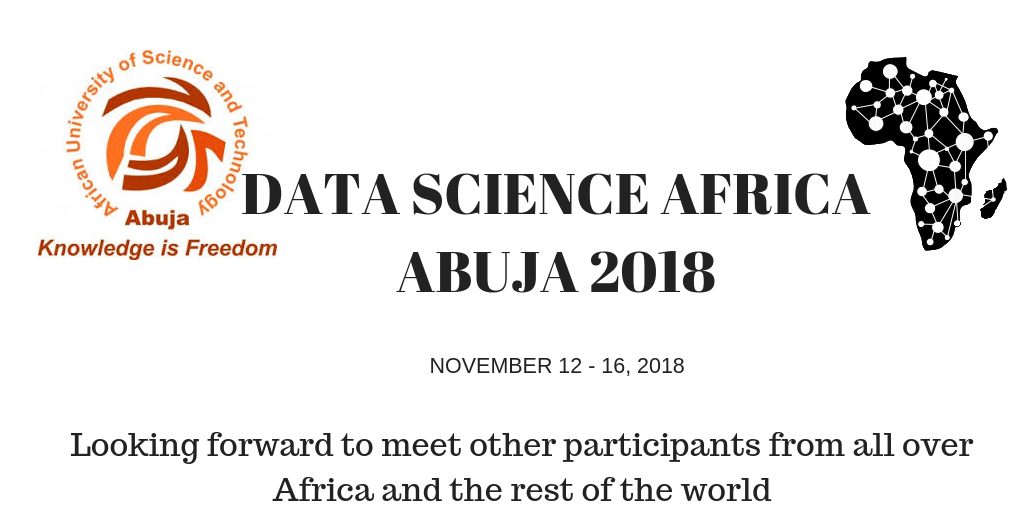

# Exploring Data With Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_columns', 50)
%matplotlib inline

## Series

There are three ways to create a series.

In [3]:
# first method: Involves passing a list without index to pd.
a = pd.Series(['food', 8, 'july', 9.0, [2,3], 'data'])
print a

0      food
1         8
2      july
3         9
4    [2, 3]
5      data
dtype: object


In [5]:
# second method: Involves passing a list of data and a list on index
data = pd.Series(['food', 8, 'july', 9.0, [2,3], 'data'], 
                index=['a','b','c', 'd', 'e', 'f'])
print data

a      food
b         8
c      july
d         9
e    [2, 3]
f      data
dtype: object


In [8]:
# third method: Involves passing a dictionary
data = {'Lagos': 1000, 'Kaduna': 1300, 'Abuja': 900, 'Anambra': 1100,
     'Plateau': 450, 'Ebonyi': None}
states = pd.Series(data)
print states

Abuja       900.0
Anambra    1100.0
Ebonyi        NaN
Kaduna     1300.0
Lagos      1000.0
Plateau     450.0
dtype: float64


### One can basically perform any operations on the series like a numpy array.

In [11]:
print states['Lagos']  # index with dictionary keys

1000.0


In [12]:
print states[states > 1000]  # boolean indexing

Anambra    1100.0
Kaduna     1300.0
dtype: float64


In [13]:
print states > 1000

Abuja      False
Anambra     True
Ebonyi     False
Kaduna      True
Lagos      False
Plateau    False
dtype: bool


In [14]:
print 'Abuja' in states  # check for membership

True


In [15]:
print states.notnull()  # check for availablility of values

Abuja       True
Anambra     True
Ebonyi     False
Kaduna      True
Lagos       True
Plateau     True
dtype: bool


In [18]:
print states[states.isnull()]   # expose null states

Ebonyi   NaN
dtype: float64


# DataFrame

### It's basically a table-like structure. It has rows and columns.

## How are DataFrames birthed

### Let's explore some of the ways we can read in data.  

In [25]:
# we can create a new dataframe
data = {'year': [1986, 1990, 1994, 1998, 2002, 2006, 2011, 2014],
        'team': ['Argentina', 'Germany', 'Brazil', 'France', 'Brazil', 'Italy', 'Spain', 'Germany'],
        'goal_for': [3, 1, 3, 3, 2, 5, 1, 1],
        'goal_against': [2, 0, 2, 0, 0, 3, 0, 0]}
soccer = pd.DataFrame(data, columns=['year', 'team', 'goal_for', 'goal_against'])
soccer

,year,team,goal_for,goal_against
0,1986,Argentina,3,2
1,1990,Germany,1,0
2,1994,Brazil,3,2
3,1998,France,3,0
4,2002,Brazil,2,0
5,2006,Italy,5,3
6,2011,Spain,1,0
7,2014,Germany,1,0


In [26]:
from_csv = pd.read_csv('Secondary.csv')
from_csv.head()

,Name of School,LGA,Ownership,Type of School,Email,Phone Numbers,Link
0,"ALTERNATIVE HIGH SCHOOL FOR GIRLS, Agboju",State owned,Amuwo-Odofin,Secondary,altergirlssc@lagosschoolsonline.com,08037218349,"=HYPERLINK(""http://www.lagosschoolsonline.com/..."
1,"A & T COLLEGE, Tabon-Tabon",Privately owned,Agege,Secondary,,"0803 385 4578, 0803 325 8098","=HYPERLINK(""http://www.lagosschoolsonline.com/..."
2,"A P COLLEGE, Ejigbo",Privately owned,Oshodi-Isolo,Secondary,anyebe_peter@yahoo.com,"0805 193 2373, 0806 683 7468","=HYPERLINK(""http://www.lagosschoolsonline.com/..."
3,A-U-D JUNIOR COMPREHENSIVE HIGH SCHOOL,State owned,Oshodi-Isolo,Secondary,okotaaudjnr@yahoo.com,0802 033 0476,"=HYPERLINK(""http://www.lagosschoolsonline.com/..."
4,A-U-D JUNIOR GRAMMAR SCHOOL,State owned,Oshodi-Isolo,Secondary,,08023509792,"=HYPERLINK(""http://www.lagosschoolsonline.com/..."


### So let's write to excel and also read from excel. This might require installing xlrd, so let's do pip install xlrd

In [27]:
soccer.head()

,year,team,goal_for,goal_against
0,1986,Argentina,3,2
1,1990,Germany,1,0
2,1994,Brazil,3,2
3,1998,France,3,0
4,2002,Brazil,2,0


In [28]:
soccer.to_excel('soccer.xlsx')

In [29]:
del soccer

In [30]:
soccer = pd.read_excel('soccer.xlsx')

In [31]:
soccer.head()

,year,team,goal_for,goal_against
0,1986,Argentina,3,2
1,1990,Germany,1,0
2,1994,Brazil,3,2
3,1998,France,3,0
4,2002,Brazil,2,0


## Reading From SQL database

In [43]:
import os
basedir = os.path.realpath('.')
from pandas.io import sql
import sqlite3
#conn = sqlite3.connect('sqlite:////' + os.path.join(basedir, 'data.sqlite'))
conn = sqlite3.connect('data.sqlite')

In [45]:
soccer.to_sql(name='test',con=conn)

In [49]:
query = "SELECT * FROM test"
result = pd.read_sql(query, con=conn)
result.head()

,index,year,team,goal_for,goal_against
0,0,1986,Argentina,3,2
1,1,1990,Germany,1,0
2,2,1994,Brazil,3,2
3,3,1998,France,3,0
4,4,2002,Brazil,2,0


## Read data from url

In [50]:
url = 'https://raw.githubusercontent.com/kantologist/abuja_schools/master/data/international-schools.csv'
from_url = pd.read_csv(url)
from_url.head()

,Name of School,School Description,Type of School,Address,Phone Numbers,School Website,Link
0,Aduvie International School,Aduvie International School offers educational...,international-schools,"Plot 273, BO8, Cadastral Zone, Jahi District, ...",0808 939 4474,"=HYPERLINK(""http://www.aduvieinternationalscho...","=HYPERLINK(""http://www.finelib.com/listing/Adu..."
1,British Canadian International Education,BCIE is a reputable independent organisation t...,international-schools,"24B, Djibouti Crescent, 5th House after Zartec...","0817-149-5402, 0909-347-8930, 0806-678-8636","=HYPERLINK(""http://www.bcie.co.uk/offices/nige...","=HYPERLINK(""http://www.finelib.com/listing/Bri..."
2,Center for Teaching & Learning (CTL),CTL Academy is an international school offerin...,international-schools,"2, Oladunni Ayandipo Close, Katampe Extension,...","0818 194 6446, 0703 514 7277","=HYPERLINK(""http://www.ctlacademy.org/"",""Visit...","=HYPERLINK(""http://www.finelib.com/listing/Cen..."
3,Efab International School,Efab International School provides educational...,international-schools,"Along 2nd Avenue, Efab City Estate, Mbora, Abu...",0817 490 9071,"=HYPERLINK(""http://www.efabintlschool.com/"",""V...","=HYPERLINK(""http://www.finelib.com/listing/Efa..."
4,FAMAKS International School,FAMAKS International School provides education...,international-schools,"8, Adekunle Fajyi Close, Off Ajayi Crowther St...",0808 305 1079,"=HYPERLINK(""http://www.famakschools.com/"",""Vis...","=HYPERLINK(""http://www.finelib.com/listing/FAM..."


## So let's explore a sample data. Lagos Schools

In [52]:
schools = from_csv
schools.head()

,Name of School,LGA,Ownership,Type of School,Email,Phone Numbers,Link
0,"ALTERNATIVE HIGH SCHOOL FOR GIRLS, Agboju",State owned,Amuwo-Odofin,Secondary,altergirlssc@lagosschoolsonline.com,08037218349,"=HYPERLINK(""http://www.lagosschoolsonline.com/..."
1,"A & T COLLEGE, Tabon-Tabon",Privately owned,Agege,Secondary,,"0803 385 4578, 0803 325 8098","=HYPERLINK(""http://www.lagosschoolsonline.com/..."
2,"A P COLLEGE, Ejigbo",Privately owned,Oshodi-Isolo,Secondary,anyebe_peter@yahoo.com,"0805 193 2373, 0806 683 7468","=HYPERLINK(""http://www.lagosschoolsonline.com/..."
3,A-U-D JUNIOR COMPREHENSIVE HIGH SCHOOL,State owned,Oshodi-Isolo,Secondary,okotaaudjnr@yahoo.com,0802 033 0476,"=HYPERLINK(""http://www.lagosschoolsonline.com/..."
4,A-U-D JUNIOR GRAMMAR SCHOOL,State owned,Oshodi-Isolo,Secondary,,08023509792,"=HYPERLINK(""http://www.lagosschoolsonline.com/..."


In [53]:
schools.info()   # data inspection

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 7 columns):
Name of School    2098 non-null object
LGA               2098 non-null object
Ownership         2083 non-null object
Type of School    2098 non-null object
Email             2097 non-null object
Phone Numbers     2098 non-null object
Link              2098 non-null object
dtypes: object(7)
memory usage: 114.8+ KB


In [54]:
schools.dtypes

Name of School    object
LGA               object
Ownership         object
Type of School    object
Email             object
Phone Numbers     object
Link              object
dtype: object

In [56]:
schools.describe()

,Name of School,LGA,Ownership,Type of School,Email,Phone Numbers,Link
count,2098,2098,2083,2098,2097,2098,2098
unique,1699,7,26,2,1351,1686,1708
top,COMMUNITY JUNIOR SECONDARY SCHOOL,Privately owned,Alimosho,Secondary,,,"=HYPERLINK(""http://www.lagosschoolsonline.com/..."
freq,4,1166,386,2097,418,7,2


In [57]:
schools.head()

,Name of School,LGA,Ownership,Type of School,Email,Phone Numbers,Link
0,"ALTERNATIVE HIGH SCHOOL FOR GIRLS, Agboju",State owned,Amuwo-Odofin,Secondary,altergirlssc@lagosschoolsonline.com,08037218349,"=HYPERLINK(""http://www.lagosschoolsonline.com/..."
1,"A & T COLLEGE, Tabon-Tabon",Privately owned,Agege,Secondary,,"0803 385 4578, 0803 325 8098","=HYPERLINK(""http://www.lagosschoolsonline.com/..."
2,"A P COLLEGE, Ejigbo",Privately owned,Oshodi-Isolo,Secondary,anyebe_peter@yahoo.com,"0805 193 2373, 0806 683 7468","=HYPERLINK(""http://www.lagosschoolsonline.com/..."
3,A-U-D JUNIOR COMPREHENSIVE HIGH SCHOOL,State owned,Oshodi-Isolo,Secondary,okotaaudjnr@yahoo.com,0802 033 0476,"=HYPERLINK(""http://www.lagosschoolsonline.com/..."
4,A-U-D JUNIOR GRAMMAR SCHOOL,State owned,Oshodi-Isolo,Secondary,,08023509792,"=HYPERLINK(""http://www.lagosschoolsonline.com/..."


In [58]:
schools.tail(3)

,Name of School,LGA,Ownership,Type of School,Email,Phone Numbers,Link
2095,"DAMTOSE COLLEGE, Alakuko",Privately owned,Ifako/Ijaiye,Secondary,damtose-schools@yahoo.com,"0802 949 2237, 0812 917 5576","=HYPERLINK(""http://www.lagosschoolsonline.com/..."
2096,"DANMARTINS COLLEGE, Alagbado",Privately owned,Alimosho,Secondary,"danmartins 43@yahoo.com, akestlabinternationa...","0802 307 8222, 0805 302 8289, 0803 070 0944","=HYPERLINK(""http://www.lagosschoolsonline.com/..."
2097,"DANSOL HIGH SCHOOL, Ikeja",Privately owned,Ikeja,Secondary,dansolhighschool@yahoo.co.uk,"0805 869 7186, 0802 932 7843, 0802 343 870...","=HYPERLINK(""http://www.lagosschoolsonline.com/..."


In [59]:
schools[200:205]

,Name of School,LGA,Ownership,Type of School,Email,Phone Numbers,Link
200,AYANGBUREN SENIOR HIGH SCHOOL,State owned,Ikorodu,Secondary,gburensnrsch@lagosschoolsonline.com,0802-327-0643,"=HYPERLINK(""http://www.lagosschoolsonline.com/..."
201,"AYEDERE AJIBOLA JUNIOR HIGH SCHOOL, Ketu",State owned,Kosofe,Secondary,ayeajijunior@lagosschoolsonline.com,0803-074 3806,"=HYPERLINK(""http://www.lagosschoolsonline.com/..."
202,"AYEDERE AJIBOLA SENIOR HIGH SCHOOL, Ketu",State owned,Kosofe,Secondary,ayederesnr@lagosschoolsonline.com,0803 373 2921,"=HYPERLINK(""http://www.lagosschoolsonline.com/..."
203,"AYO-OLUSEUN COLLEGE, Alapere",Privately owned,Kosofe,Secondary,,"0702 808 1787, 0802 339 9150","=HYPERLINK(""http://www.lagosschoolsonline.com/..."
204,"AYOBAMI COLLEGE, Egan-Igando",Privately owned,Alimosho,Secondary,ayobami/pschool@yahoo.com,0802 303 5154,"=HYPERLINK(""http://www.lagosschoolsonline.com/..."


### oops!  LGA and Ownership are mixed up. Let's fix that.

In [75]:
schools.columns

Index([u'Name of School', u'LGA', u'Ownership', u'Type of School', u'Email',
       u'Phone Numbers', u'Link'],
      dtype='object')

In [83]:
schools.rename(columns= {'LGA':'Ownership', 'Ownership':'LGA'}, inplace=True )
schools.columns

Index([u'Name of School', u'Ownership', u'LGA', u'Type of School', u'Email',
       u'Phone Numbers', u'Link'],
      dtype='object')

In [85]:
schools['Ownership'].head()

0        State owned
1    Privately owned
2    Privately owned
3        State owned
4        State owned
Name: Ownership, dtype: object

In [86]:
schools[['LGA', 'Ownership']].head()

,LGA,Ownership
0,Amuwo-Odofin,State owned
1,Agege,Privately owned
2,Oshodi-Isolo,Privately owned
3,Oshodi-Isolo,State owned
4,Oshodi-Isolo,State owned


In [88]:
schools[(schools.Ownership == 'State owned')].head(3)

,Name of School,Ownership,LGA,Type of School,Email,Phone Numbers,Link
0,"ALTERNATIVE HIGH SCHOOL FOR GIRLS, Agboju",State owned,Amuwo-Odofin,Secondary,altergirlssc@lagosschoolsonline.com,08037218349,"=HYPERLINK(""http://www.lagosschoolsonline.com/..."
3,A-U-D JUNIOR COMPREHENSIVE HIGH SCHOOL,State owned,Oshodi-Isolo,Secondary,okotaaudjnr@yahoo.com,0802 033 0476,"=HYPERLINK(""http://www.lagosschoolsonline.com/..."
4,A-U-D JUNIOR GRAMMAR SCHOOL,State owned,Oshodi-Isolo,Secondary,,08023509792,"=HYPERLINK(""http://www.lagosschoolsonline.com/..."


In [90]:
schools[(schools.Ownership == 'State owned') & (schools.LGA == 'Oshodi-Isolo')].head(3)

,Name of School,Ownership,LGA,Type of School,Email,Phone Numbers,Link
3,A-U-D JUNIOR COMPREHENSIVE HIGH SCHOOL,State owned,Oshodi-Isolo,Secondary,okotaaudjnr@yahoo.com,0802 033 0476,"=HYPERLINK(""http://www.lagosschoolsonline.com/..."
4,A-U-D JUNIOR GRAMMAR SCHOOL,State owned,Oshodi-Isolo,Secondary,,08023509792,"=HYPERLINK(""http://www.lagosschoolsonline.com/..."
9,A.U.D. COMPREHENSIVE JUNIOR HIGH SCHOOL,State owned,Oshodi-Isolo,Secondary,audcomp@lagosschoolsonline.com,0802 033 0476,"=HYPERLINK(""http://www.lagosschoolsonline.com/..."


In [91]:
schools.iloc[[0, 78, 300]]

,Name of School,Ownership,LGA,Type of School,Email,Phone Numbers,Link
0,"ALTERNATIVE HIGH SCHOOL FOR GIRLS, Agboju",State owned,Amuwo-Odofin,Secondary,altergirlssc@lagosschoolsonline.com,08037218349,"=HYPERLINK(""http://www.lagosschoolsonline.com/..."
78,"AJUNMONI SENIOR SECONDARY SCHOOL, Mushin",State owned,Mushin,Secondary,ajumoni2014@lagosschoolsonline.com,0802-3166-414,"=HYPERLINK(""http://www.lagosschoolsonline.com/..."
300,"CARRINTON COLLEGE, Ajao Estate",Privately owned,Oshodi-Isolo,Secondary,archwood.school@yahoo.com,"0803 305 5394, 0811 716 5698","=HYPERLINK(""http://www.lagosschoolsonline.com/..."


In [93]:
schools.groupby('LGA').count().head()

,Name of School,Ownership,Type of School,Email,Phone Numbers,Link
LGA,,,,,,
Badagry,71,71,71,71,71,71
Ibeju-Lekki,34,34,34,34,34,34
Ikeja,71,71,71,71,71,71
Mushin,86,86,86,86,86,86
Shomolu,53,53,53,53,53,53


In [94]:
schools.groupby('LGA').size().tail()

LGA
Mushin            6
Ojo             156
Oshodi-Isolo    157
Ownership         1
Surulere        145
dtype: int64

## End For now

## Reference

1. [Greg Reda's blog](http://www.gregreda.com/2013/10/26/working-with-pandas-dataframes/)